In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Run before importing Kmeans
import os
os.environ["OMP_NUM_THREADS"]='1'

In [2]:
#Importing the dataset
data=pd.read_csv('wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14,2,2,16,127,3,3,0,2,6,1,4,1065
1,13,2,2,11,100,3,3,0,1,4,1,3,1050
2,13,2,3,19,101,3,3,0,3,6,1,3,1185
3,14,2,3,17,113,4,3,0,2,8,1,3,1480
4,13,3,3,21,118,3,3,0,2,4,1,3,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Alcohol               178 non-null    int64
 1   Malic_Acid            178 non-null    int64
 2   Ash                   178 non-null    int64
 3   Ash_Alcanity          178 non-null    int64
 4   Magnesium             178 non-null    int64
 5   Total_Phenols         178 non-null    int64
 6   Flavanoids            178 non-null    int64
 7   Nonflavanoid_Phenols  178 non-null    int64
 8   Proanthocyanins       178 non-null    int64
 9   Color_Intensity       178 non-null    int64
 10  Hue                   178 non-null    int64
 11  OD280                 178 non-null    int64
 12  Proline               178 non-null    int64
dtypes: int64(13)
memory usage: 18.1 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.988764,2.410112,2.308989,19.640449,99.741573,2.325843,2.095506,0.185393,1.573034,5.106742,1.000000,2.640449,746.893258
std,0.863502,1.137600,0.475416,3.413986,14.282484,0.709504,0.995403,0.389713,0.653329,2.356589,0.106299,0.732571,314.907474
min,11.000000,1.000000,1.000000,11.000000,70.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,278.000000
25%,12.000000,2.000000,2.000000,17.000000,88.000000,2.000000,1.000000,0.000000,1.000000,3.000000,1.000000,2.000000,500.500000
50%,13.000000,2.000000,2.000000,20.000000,98.000000,2.000000,2.000000,0.000000,2.000000,5.000000,1.000000,3.000000,673.500000
75%,14.000000,3.000000,3.000000,22.000000,107.000000,3.000000,3.000000,0.000000,2.000000,6.000000,1.000000,3.000000,985.000000
max,15.000000,6.000000,3.000000,30.000000,162.000000,4.000000,5.000000,1.000000,4.000000,13.000000,2.000000,4.000000,1680.000000


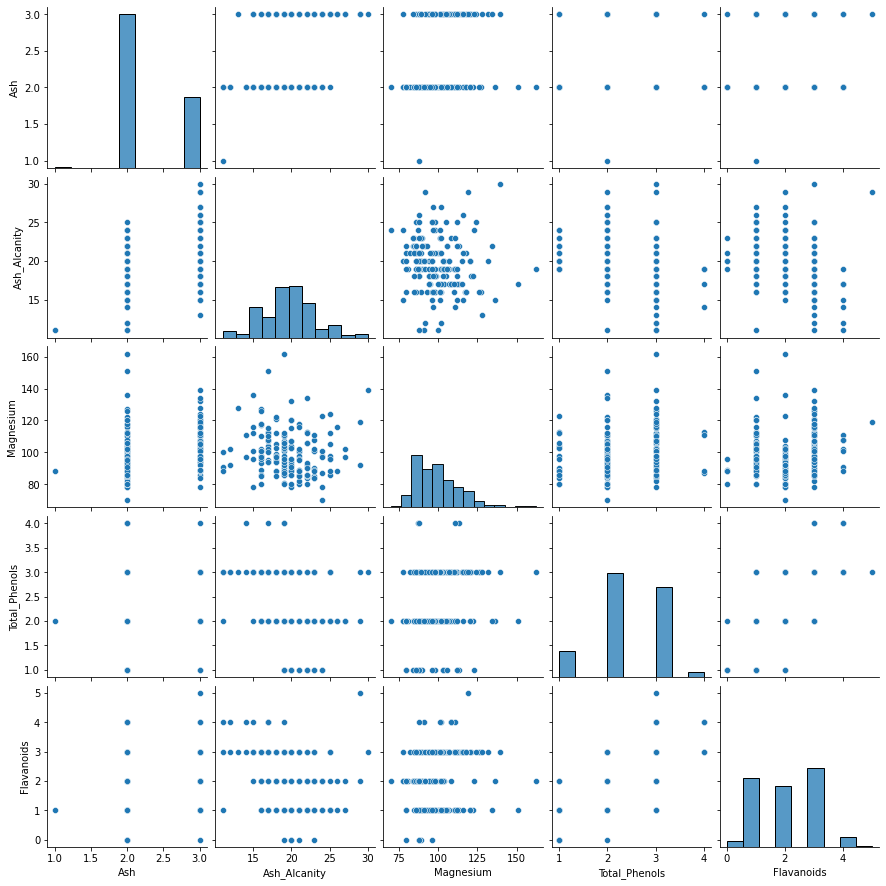

In [3]:
sns.pairplot(data.iloc[:,[2,3,4,5,6]])

In [4]:
from sklearn.preprocessing import StandardScaler
X=data.iloc[:,[4,5]].values
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

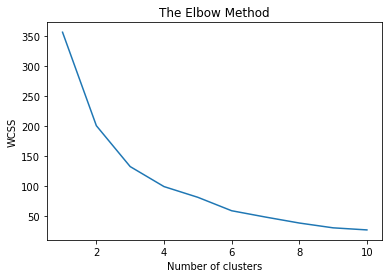

In [5]:
# Using the elbow method to find th eoptimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

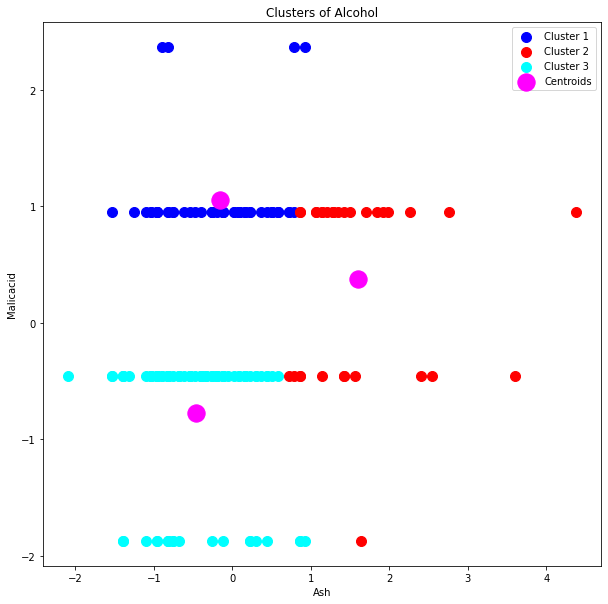

In [24]:
#Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='red',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='cyan',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='magenta',label='Centroids')
plt.title('Clusters of Alcohol')
plt.xlabel('Ash')
plt.ylabel('Malicacid')
plt.legend()
plt.show()

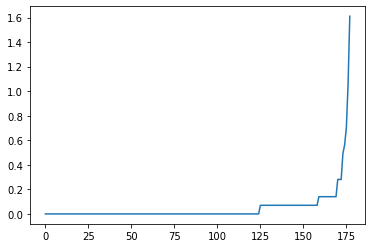

In [22]:
from sklearn.neighbors import NearestNeighbors
neighbours=NearestNeighbors(n_neighbors=2)
distances,indices=neighbours.fit(X).kneighbors(X)
distances=distances[:,1]
distances=np.sort(distances,axis=0)
plt.plot(distances)

In [25]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.125,min_samples=5)
y_dbscan=dbscan.fit_predict(X)

In [26]:
# Inspect the array to identify number of clusters
y_dbscan

array([-1,  0,  0, -1,  1,  6,  2, -1,  2,  2,  4,  3, -1, -1,  0,  6,  1,
        1,  4,  1, -1,  5,  0,  3,  2, -1, -1,  3,  4,  2,  0,  4,  5, -1,
       -1,  0,  6,  3,  3, -1,  1,  3,  0,  0,  4,  6,  0,  0,  0,  4, -1,
        3, -1,  1,  1,  1,  1,  0,  4,  3,  5,  3,  3, -1,  5,  3, -1, -1,
        6, -1, -1,  7,  3, -1,  0,  3,  3, -1, -1,  0,  3,  3, -1,  3,  3,
        3,  3,  3,  3, -1, -1, -1, -1,  3,  2, -1, -1,  7, -1, -1,  3,  8,
        2,  7,  3,  3, -1, -1,  3, -1,  4, -1,  5,  3,  7,  3,  3, -1, -1,
        3,  2,  1,  5,  7, -1,  7,  7,  3,  3, -1, -1, -1, -1,  9,  3,  3,
        8,  3,  3,  5,  3,  8,  3,  3, -1,  5, -1,  3,  3, -1, -1, -1, -1,
        3, -1,  3,  3,  3,  2, -1,  3, -1,  9, -1,  8,  8, -1,  8,  9, -1,
       -1, -1,  3,  3,  5, -1, -1,  3], dtype=int32)

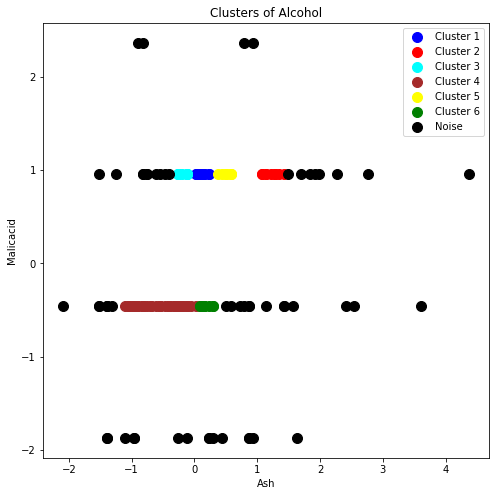

In [27]:
#Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan==0,0],X[y_dbscan==0,1],s=100,c='blue',label='Cluster 1')
plt.scatter(X[y_dbscan==1,0],X[y_dbscan==1,1],s=100,c='red',label='Cluster 2')
plt.scatter(X[y_dbscan==2,0],X[y_dbscan==2,1],s=100,c='cyan',label='Cluster 3')
plt.scatter(X[y_dbscan==3,0],X[y_dbscan==3,1],s=100,c='brown',label='Cluster 4')
plt.scatter(X[y_dbscan==4,0],X[y_dbscan==4,1],s=100,c='yellow',label='Cluster 5')
plt.scatter(X[y_dbscan==5,0],X[y_dbscan==5,1],s=100,c='green',label='Cluster 6')
plt.scatter(X[y_dbscan==-1,0],X[y_dbscan==-1,1],s=100,c='black',label='Noise')
plt.title('Clusters of Alcohol')
plt.xlabel('Ash')
plt.ylabel('Malicacid')
plt.legend()
plt.show()